In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import pylab as plt   # import matplotlib.pyplot as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [3]:
jaws_clean = pd.read_csv('jaws_clean.csv', encoding='latin-1')

In [5]:
jaws_fatal = jaws_clean.groupby(by='year')

In [ ]:
jaws_fa

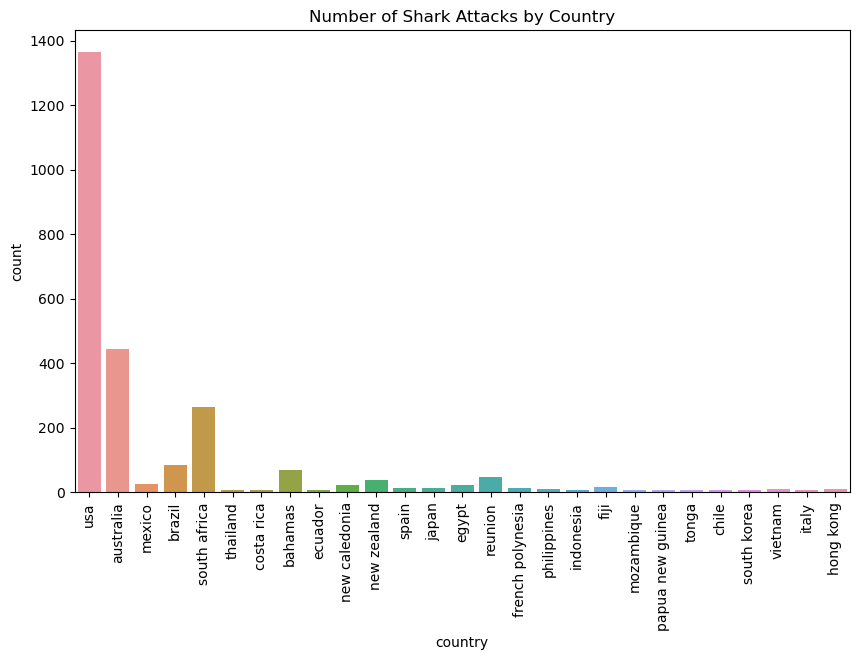

In [8]:

countries_gt_5 = jaws_clean['country'].value_counts().loc[lambda x: x > 5].index
filtered_data = jaws_clean[jaws_clean['country'].isin(countries_gt_5)]

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='country')
plt.xticks(rotation=90)
plt.title('Number of Shark Attacks by Country')
plt.show()

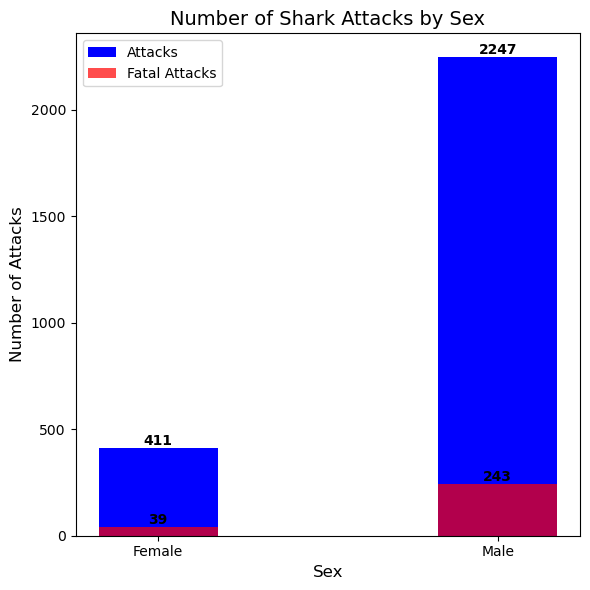

The female fatality ratio is: 9.49%
The male fatality ratio is: 10.81%


In [23]:

# Replace 'True' and 'False' values with 'Male' and 'Female', respectively
jaws_clean['sex'] = jaws_clean['sex'].replace({True: 'Male', False: 'Female'})

# Group data by sex and calculate attack and fatal attack counts
grouped_data = jaws_clean.groupby('sex').agg({'fatality': ['count', 'sum']})
grouped_data.columns = ['attack_count', 'fatal_count']
grouped_data.reset_index(inplace=True)

# Prepare the data for plotting
sex = grouped_data['sex'].tolist()
attack_counts = grouped_data['attack_count'].fillna(0).tolist()
fatal_counts = grouped_data['fatal_count'].fillna(0).tolist()

# Calculate the female and male fatality ratios
female_attacks = attack_counts[sex.index('Female')]
female_fatal = fatal_counts[sex.index('Female')]
female_ratio = female_fatal / female_attacks

male_attacks = attack_counts[sex.index('Male')]
male_fatal = fatal_counts[sex.index('Male')]
male_ratio = male_fatal / male_attacks

# Set the width of the bars
width = 0.35

# Set the positions of the bars on the x-axis
x = np.arange(len(sex))

# Plot the bars
fig, ax = plt.subplots(figsize=(6, 6))
bar1 = ax.bar(x, attack_counts, width, color='blue', label='Attacks')
bar2 = ax.bar(x, fatal_counts, width, color='red', alpha=0.7, label='Fatal Attacks')

# Customize the plot
ax.set_xlabel('Sex', fontsize=12)
ax.set_ylabel('Number of Attacks', fontsize=12)
ax.set_title('Number of Shark Attacks by Sex', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(sex)
ax.legend()

# Add labels for the counts on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, height,
                ha='center', va='bottom', fontweight='bold')

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()

# Show the plot
plt.show()

# Print the female fatality ratio and male fatality ratio
print(f"The female fatality ratio is: {female_ratio:.2%}")
print(f"The male fatality ratio is: {male_ratio:.2%}")

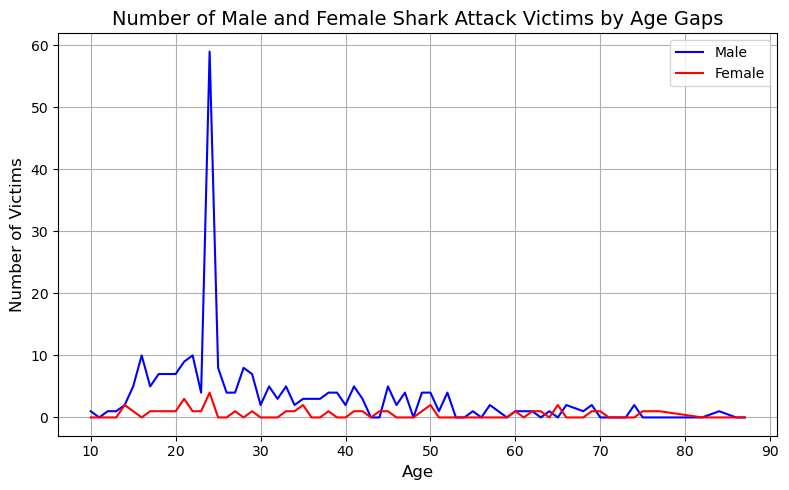

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'shark_attacks' with columns: age_gaps, sex, victim_count

# Group data by age gaps and sex to calculate the total number of male and female victims per age gap
grouped_data = jaws_clean.groupby(['age', 'sex']).agg({'fatality': 'sum'})
grouped_data.reset_index(inplace=True)

# Pivot the data to have separate columns for male and female victim counts per age gap
pivoted_data = grouped_data.pivot(index='age', columns='sex', values='fatality')

# Prepare the data for plotting
age_gaps = pivoted_data.index
male_victims = pivoted_data['Male'].fillna(0)
female_victims = pivoted_data['Female'].fillna(0)

# Plot the data
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(age_gaps, male_victims, color='blue', label='Male')
ax.plot(age_gaps, female_victims, color='red', label='Female')

# Customize the plot
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Number of Victims', fontsize=12)
ax.set_title('Number of Male and Female Shark Attack Victims by Age Gaps', fontsize=14)
ax.legend()
ax.grid(True)

plt.tight_layout()

# Show the plot
plt.show()